# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정한다.    
    

## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.


$$
\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right)\\
\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
$$

### 로지스틱 함수
- 0과 1사이의 실수를 반환한다.
- S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

##### logistic 함수 시각화

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))  

X = np.linspace(-10, 10, 1000) 
y = logistic_func(X)

In [2]:
y.min(), y.max()

(4.5397868702434395e-05, 0.9999546021312976)

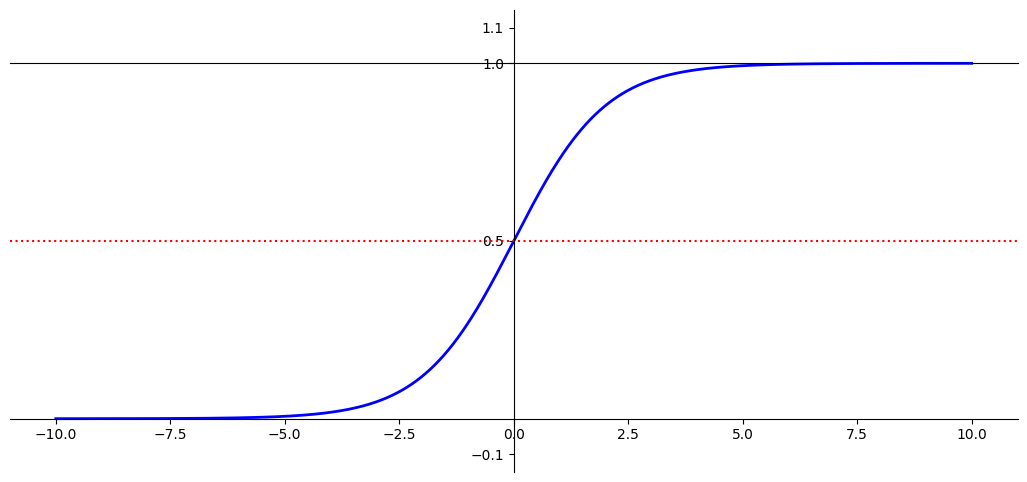

In [3]:
plt.figure(figsize=(13, 6))

plt.plot(X, y, color='b', linewidth=2)

plt.axhline(y=0.5, color='r', linestyle=':')
# plt.axvline(x=5, color='b', linestyle=':')

plt.ylim(-0.15, 1.15)
plt.yticks([-0.1, 0.5, 1.0, 1.1])

ax = plt.gca()
ax.spines['left'].set_position("center")
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['top'].set_position(("data", 1.0))
ax.spines['right'].set_visible(False)
plt.show()

## LogisticRegression의 손실 함수(Loss Function)
- **Cross Entropy(로그손실-log loss)**
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다.
        - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해서 log를 취한다.


$$
\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$


- **Binary Cross Entropy**
    - Logistic 함수를 이용한 추론 결과에 대한 cross entropy 계산
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일 때와 1일 때 계산하는 것이 다르다. 그것을 하나의 공식으로 정의한 것이 binary cross entropy이다.
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
$$

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수.
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적으로 한다.
> 

In [11]:
0.2**2 * 0.8**8 * 45

0.3019898880000002

## 최적화 

### 최적화란
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - Classification(분류)의 경우 cross entropy(log loss)를 사용한다.
    - Regression(회귀)의 경우 MSE(Mean Squared Error)를 사용한다.

### LogisticRegression의 최적화
- 분류 문제이므로 Cross entropy(Log loss함수)를 손실함수로 사용한다.
- Cross entropy는 loss의 최소값으로 하는 parameter 찾는 방정식이 없기 때문에 **LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.**

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다(단순).
- max_iter(기본값 100) : 경사하강법 반복횟수

## 예제

In [1]:
from dataset import get_breast_cancer_dataset

from sklearn.linear_model import LogisticRegression
from metrics import print_metrics_classification

##### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다.

In [2]:
(X_train, X_test, y_train, y_test), feature_names = get_breast_cancer_dataset(scaling=True)

In [3]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [4]:
lr.coef_

array([[-0.54421961, -0.33816365, -0.49658854, -0.56367062, -0.05759044,
         0.39680811, -0.80725766, -1.10577427,  0.03333306,  0.40475341,
        -1.21338595, -0.13991709, -0.52826217, -0.75572362, -0.21822029,
         0.7046107 ,  0.02933418, -0.34885813,  0.47129277,  0.55460286,
        -0.99474606, -1.10737612, -0.78125205, -0.87125415, -0.47159373,
        -0.13437322, -0.69037962, -0.92450679, -0.70421144, -0.74047413]])

In [5]:
lr.intercept_

array([0.33064054])

In [6]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
pred_test[:5]

array([1, 0, 0, 1, 0])

In [7]:
proba_train = lr.predict_proba(X_train)
proba_test = lr.predict_proba(X_test)
proba_test[:5]

array([[4.24618815e-03, 9.95753812e-01],
       [9.99974531e-01, 2.54689803e-05],
       [9.99772845e-01, 2.27155258e-04],
       [4.21840224e-04, 9.99578160e-01],
       [9.97484489e-01, 2.51551058e-03]])

In [8]:
print_metrics_classification(y_train, pred_train, proba_train[:, 1], "train set")
print_metrics_classification(y_test, pred_test, proba_test[:, 1], "test set")

==========train set==========
정확도(Accuracy): 0.9906103286384976
재현율(Recall) : 0.9962546816479401
정밀도(Precision): 0.9888475836431226
F1 Score: 0.9925373134328358
AveagePrecision Score: 0.9985756037440087
ROC-AUC Score: 0.9979035639412998
==========test set==========
정확도(Accuracy): 0.958041958041958
재현율(Recall) : 0.9666666666666667
정밀도(Precision): 0.9666666666666667
F1 Score: 0.9666666666666667
AveagePrecision Score: 0.9971317270472638
ROC-AUC Score: 0.9951781970649896


In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'penalty':['l1', 'l2'], #l1: Lasso, l2: Ridge, None: Linear Regression
    'C':[0.01, 0.1, 1, 5, 10], # 작을수록 강한 규제(overfitting: 작은값으로 변경.)
}
# solver: 최적화 알고리즘 -> 경사하강법을 개선한 알고리즘.
gs = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'), 
                  params, 
                  scoring='accuracy', 
                  cv=4, 
                  n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [10]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [11]:
gs.best_score_

0.9813084112149533

In [12]:
import pandas as pd
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,0.003917,0.006784,0.004212,0.006631,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.953271,0.971963,1.000000,1.000000,0.981308,0.019825,1
5,0.004185,0.007248,0.003876,0.006714,1,l2,"{'C': 1, 'penalty': 'l2'}",0.953271,0.971963,0.990566,0.981132,0.974233,0.013774,2
2,0.001930,0.002707,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.943925,0.971963,0.981132,0.990566,0.971896,0.017437,3
1,0.003090,0.003633,0.000501,0.000501,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.925234,0.971963,0.990566,0.981132,0.967224,0.025119,4
4,0.004212,0.007296,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",0.943925,0.962617,0.981132,0.981132,0.967202,0.015419,5


In [13]:
import numpy as np
import matplotlib.pyplot as plt

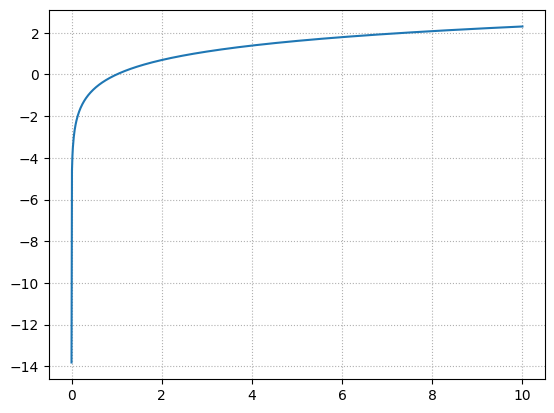

In [37]:
X = np.linspace(0.000001, 10, 1000)
y = np.log(X)

plt.plot(X, y)
plt.grid(linestyle=':');

In [38]:
y[0]

-13.815510557964274

In [40]:
-np.log(1)

-0.0

In [47]:
-np.log(0.500001)

0.6931451805619453

In [46]:
-np.log(0.000000000001)

27.631021115928547